In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
import cv2

# importing model 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#importing warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/Users/swathy/Downloads/archive (1)/fruits-360_dataset/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
Train_dir='/Users/swathy/Downloads/archive (1)/fruits-360_dataset/fruits-360/Training/'
Test_dir='/Users/swathy/Downloads/archive (1)/fruits-360_dataset/fruits-360/Test/'

In [3]:
import os

Fruits=[]
Fruits_Picture=[]

for i in os.listdir(Train_dir):
    if os.path.isdir(os.path.join(Train_dir, i)):  
        for image_filename in os.listdir(os.path.join(Train_dir, i)):
            Fruits.append(i)  
            Fruits_Picture.append(i + '/' + image_filename)  


In [4]:
Train_Fruits=pd.DataFrame(Fruits, columns=["Fruits"])
Train_Fruits["Fruits Image"]=Fruits_Picture
Train_Fruits

,Fruits,Fruits Image
0,Tomato 4,Tomato 4/r_236_100.jpg
1,Tomato 4,Tomato 4/247_100.jpg
2,Tomato 4,Tomato 4/257_100.jpg
3,Tomato 4,Tomato 4/r_78_100.jpg
4,Tomato 4,Tomato 4/r_68_100.jpg
...,...,...
67687,Peach Flat,Peach Flat/220_100.jpg
67688,Peach Flat,Peach Flat/r_127_100.jpg
67689,Peach Flat,Peach Flat/156_100.jpg
67690,Peach Flat,Peach Flat/r_137_100.jpg


In [5]:
from collections import Counter
New_Data=Counter(Train_Fruits["Fruits"])
Most_Common_Fruits=New_Data.most_common(15)

print("The 15 most common fruits found in the data set and their number")
Most_Common_Fruits

The 15 most common fruits found in the data set and their number


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Tomato 3', 738),
 ('Melon Piel de Sapo', 738),
 ('Strawberry Wedge', 738),
 ('Cherry Rainier', 738),
 ('Cherry 2', 738),
 ('Tomato 1', 738),
 ('Peach 2', 738),
 ('Walnut', 735),
 ('Pear Stone', 711),
 ('Fig', 702),
 ('Cauliflower', 702),
 ('Pepper Orange', 702),
 ('Pear Forelle', 702)]

In [6]:
x,y=zip(*Most_Common_Fruits)
x,y=list(x),list(y)
print("The 15 most common fruits found in the data set: \n ", x)

The 15 most common fruits found in the data set: 
  ['Grape Blue', 'Plum 3', 'Tomato 3', 'Melon Piel de Sapo', 'Strawberry Wedge', 'Cherry Rainier', 'Cherry 2', 'Tomato 1', 'Peach 2', 'Walnut', 'Pear Stone', 'Fig', 'Cauliflower', 'Pepper Orange', 'Pear Forelle']


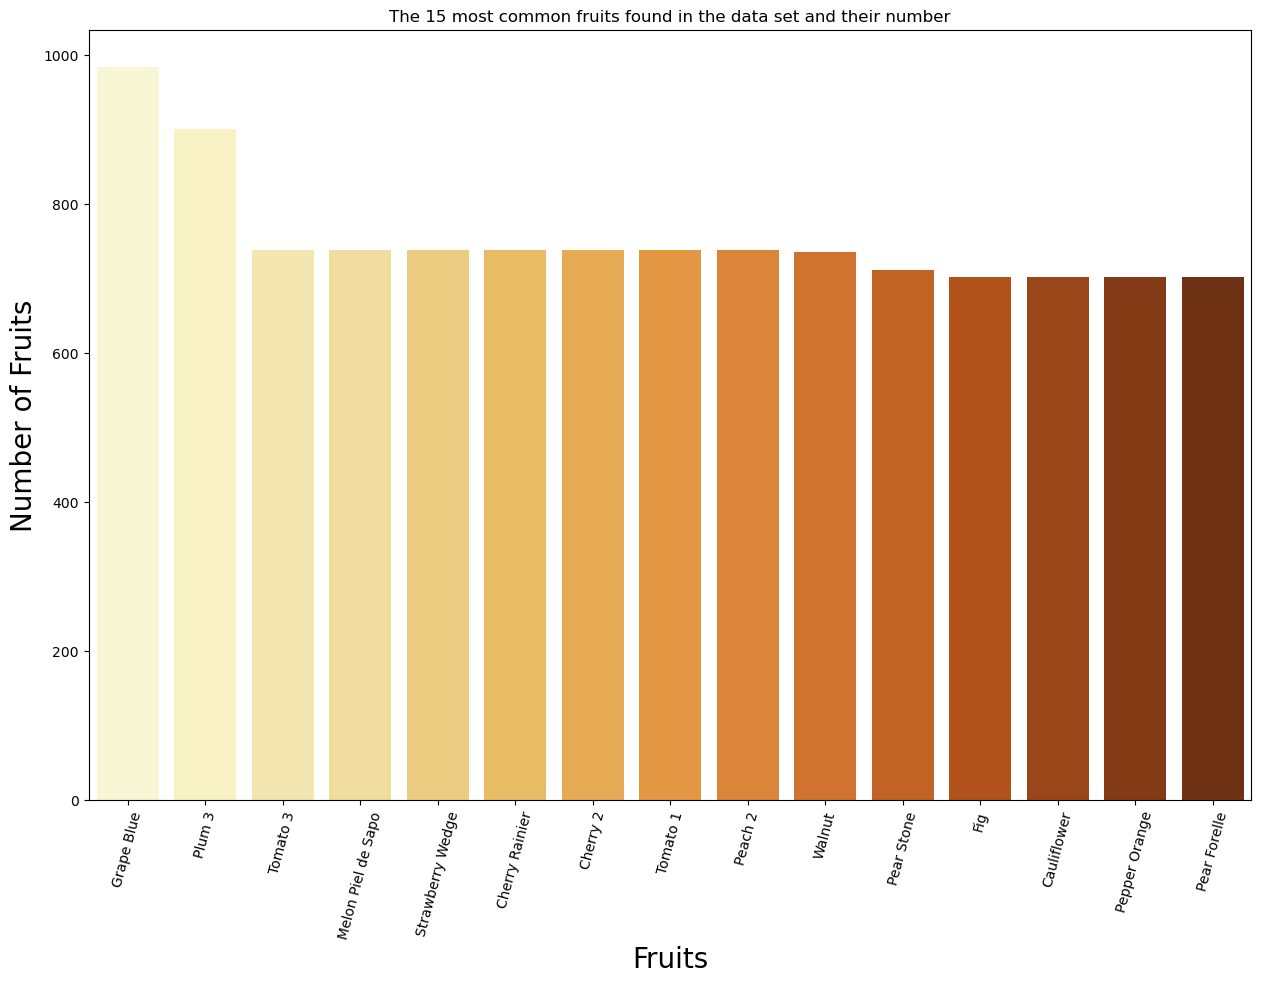

In [7]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=x, y=y, palette=sns.color_palette("YlOrBr", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('The 15 most common fruits found in the data set and their number') 
plt.show()

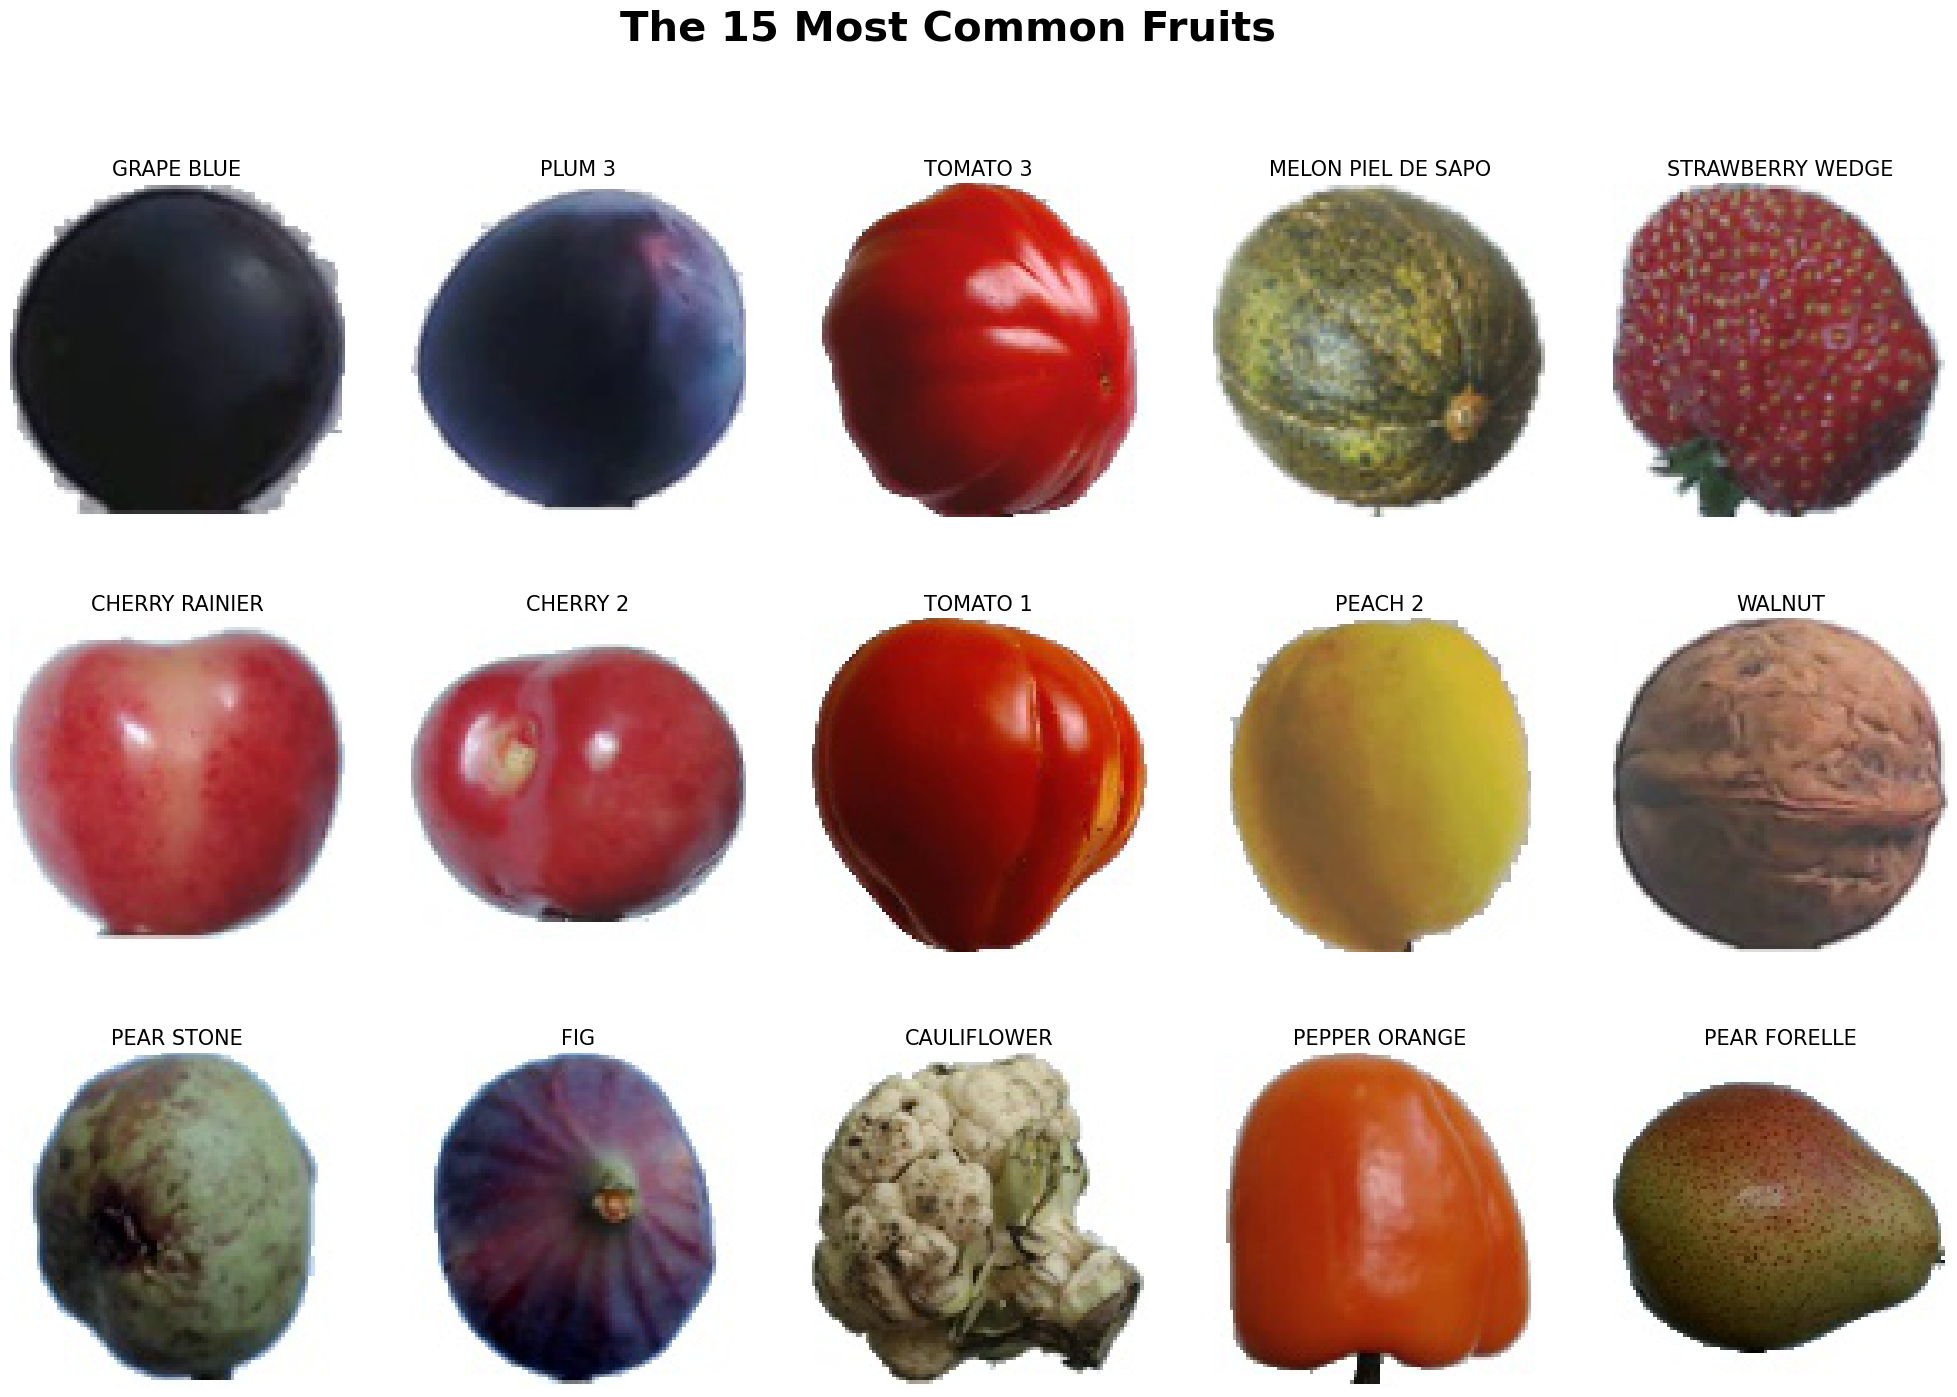

In [8]:
plt.figure(figsize=(25,16))
No_of_fruits=len(x)

for i in range(No_of_fruits):
    Fruits=Train_Fruits[Train_Fruits["Fruits"]==x[i]]["Fruits Image"].values[1]
    
    plt.subplot(3,5,i+1)
    img=load_img(Train_dir+Fruits)
    plt.imshow(img)
    plt.title(x[i].upper(),color="black",fontsize=15,fontweight=300)
    plt.axis("off")

plt.suptitle("The 15 Most Common Fruits",fontsize=30,color="black",fontweight='bold')
plt.show()

In [9]:
array_image=img_to_array(img)
print("Image Shape: ", array_image.shape)

Image Shape:  (100, 100, 3)


In [10]:
Unique_Fruit=glob(Train_dir + '/*' )
No_of_class=len(Unique_Fruit)
print("No. of fruits: ",No_of_class)

No. of fruits:  131


In [11]:
from keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())  

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())  

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(BatchNormalization())  

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())  

model.add(Dense(No_of_class))
model.add(Activation("softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 49, 49, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0

In [12]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [13]:
epochs=100  
batch_size=32
print("Target Size: ", array_image.shape[:2])

Target Size:  (100, 100)


In [15]:
train_generator=train_datagen.flow_from_directory(
        Train_dir, 
        target_size=array_image.shape[:2],
        batch_size =batch_size,
        color_mode="rgb",
        class_mode="categorical")

Found 67692 images belonging to 131 classes.


In [16]:
test_generator=test_datagen.flow_from_directory(
        Test_dir, 
        target_size=array_image.shape[:2],
        batch_size=batch_size,
        color_mode="rgb",
        class_mode="categorical")

Found 22688 images belonging to 131 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape: ",data_batch.shape)
    print("labels_batch shape: ",labels_batch.shape)
    break

data_batch shape:  (32, 100, 100, 3)
labels_batch shape:  (32, 131)


In [18]:
#Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
hist = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=1600//batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=800//batch_size)

Epoch 1/100
50/50 [==============================] - 6s 104ms/step - loss: 3.8465 - accuracy: 0.1925 - val_loss: 5.1695 - val_accuracy: 0.0050
Epoch 2/100
50/50 [==============================] - 6s 127ms/step - loss: 2.3424 - accuracy: 0.4056 - val_loss: 5.7261 - val_accuracy: 0.0175
Epoch 3/100
50/50 [==============================] - 7s 146ms/step - loss: 1.7724 - accuracy: 0.5069 - val_loss: 6.8420 - val_accuracy: 0.0025
Epoch 4/100
50/50 [==============================] - 6s 121ms/step - loss: 1.3463 - accuracy: 0.6237 - val_loss: 8.3941 - val_accuracy: 0.0075
Epoch 5/100
50/50 [==============================] - 6s 124ms/step - loss: 1.0879 - accuracy: 0.6906 - val_loss: 7.0107 - val_accuracy: 0.0113
Epoch 6/100
50/50 [==============================] - 6s 117ms/step - loss: 0.8644 - accuracy: 0.7575 - val_loss: 7.1667 - val_accuracy: 0.0100
Epoch 7/100
50/50 [==============================] - 7s 137ms/step - loss: 0.7513 - accuracy: 0.7925 - val_loss: 5.0180 - val_accuracy: 0.0437

Epoch 58/100
50/50 [==============================] - 6s 118ms/step - loss: 0.1085 - accuracy: 0.9700 - val_loss: 0.2835 - val_accuracy: 0.9275
Epoch 59/100
50/50 [==============================] - 8s 158ms/step - loss: 0.1106 - accuracy: 0.9675 - val_loss: 0.3577 - val_accuracy: 0.9200
Epoch 60/100
50/50 [==============================] - 7s 132ms/step - loss: 0.1103 - accuracy: 0.9694 - val_loss: 0.1199 - val_accuracy: 0.9613
Epoch 61/100
50/50 [==============================] - 6s 120ms/step - loss: 0.1103 - accuracy: 0.9681 - val_loss: 0.1961 - val_accuracy: 0.9525
Epoch 62/100
50/50 [==============================] - 6s 122ms/step - loss: 0.1127 - accuracy: 0.9688 - val_loss: 0.1593 - val_accuracy: 0.9613
Epoch 63/100
50/50 [==============================] - 6s 118ms/step - loss: 0.0941 - accuracy: 0.9725 - val_loss: 0.1767 - val_accuracy: 0.9588
Epoch 64/100
50/50 [==============================] - 6s 125ms/step - loss: 0.1057 - accuracy: 0.9694 - val_loss: 1.9340 - val_accuracy:

In [22]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

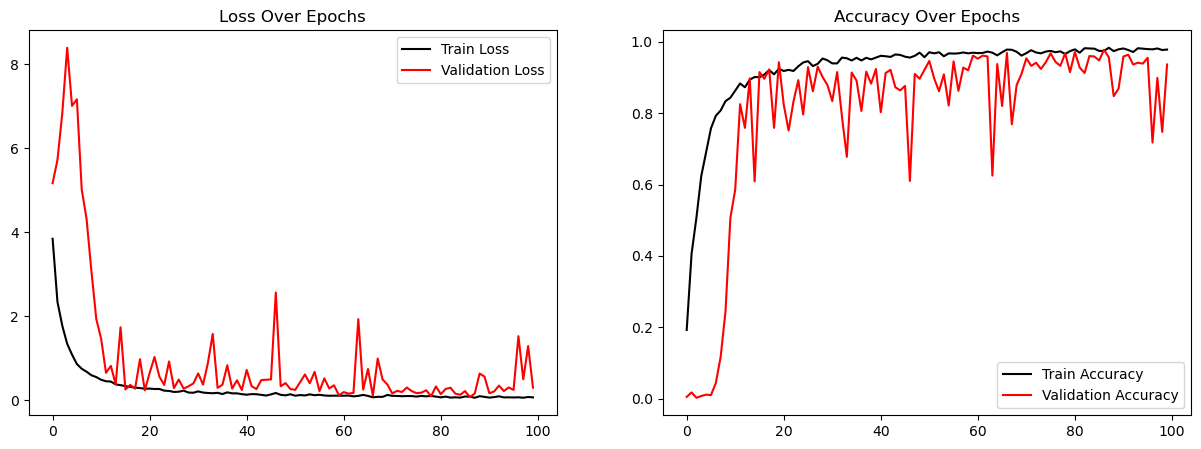

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history["loss"], label="Train Loss", color="black")
plt.plot(hist.history["val_loss"], label="Validation Loss", color="red")
plt.title("Loss Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history["accuracy"], label="Train Accuracy", color="black")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.title("Accuracy Over Epochs")
plt.legend()

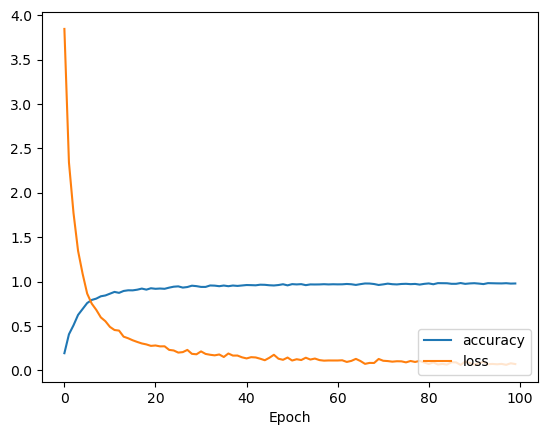

In [33]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()